11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


c:\Users\Track Computers\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


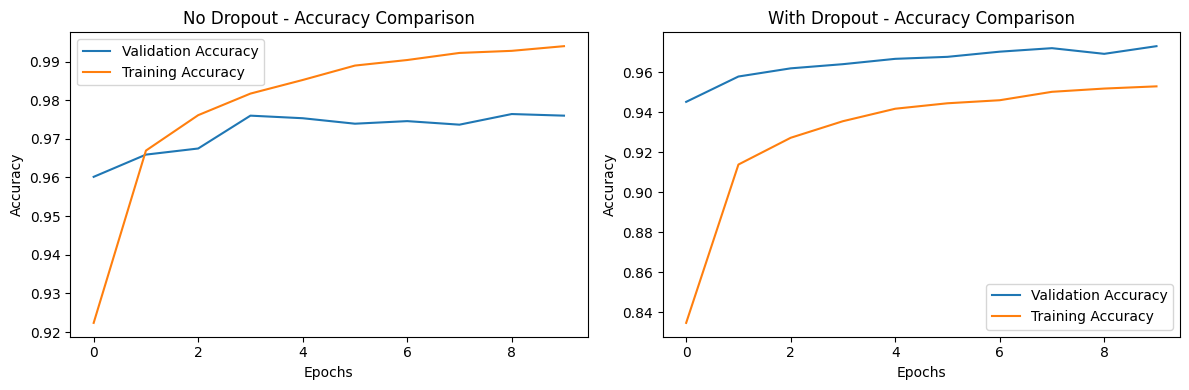


Test Accuracy Comparison:
No Dropout: 97.83%
With Dropout: 97.20%


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# Build model WITHOUT dropout
model_no_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Build model WITH dropout
model_with_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile both
for model, name in [(model_no_dropout, 'No Dropout'), (model_with_dropout, 'With Dropout')]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
# Train and compare
plt.figure(figsize=(12, 4))
for i, (model, name) in enumerate([(model_no_dropout, 'No Dropout'), 
                                    (model_with_dropout, 'With Dropout')]):
    history = model.fit(X_train, y_train, epochs=10, 
                        validation_split=0.2, verbose=0)
    plt.subplot(1, 2, i+1)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title(f'{name} - Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()
# Test accuracy
print("\nTest Accuracy Comparison:")
for model, name in [(model_no_dropout, 'No Dropout'), (model_with_dropout, 'With Dropout')]:
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name}: {acc*100:.2f}%")